# Problem Statement

The dataset consists of 2-Dimensional spectrograms of
radio signals from space collected at the SETI Institute
by the Allen Telescope Array. The objective is to
classify the radio signals from outer space into one of
four classes.

# Dataset Description

[SETI Dataset](https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma?dl=0)

> - Training Data:

>> - train_images: Normalized values of Pixels

>> - train_labels: Stored as One-Hot Encoded data

> - Validation Data:

>> - val_images: Normalized values of Pixels

>> - val_labels: Stored as One-Hot Encoded data

> - Classes: “squiggle”, “narrowband”, “narrowbanddrd”, and “noise”

## Classifying the radio signals from deep space using Keras

# Importing the basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
np.random.seed(42)
print(tf.__version__)

2.4.1


# Load and Pre-process the data

In [11]:
#Download the training data from Dropbox
!wget https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAC4IW1ZnCjTjgcNQCt6Cj9Oa/train/images.csv?dl=0
!wget https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AACFwWqQVAHzMACFr1SAlIDsa/train/labels.csv?dl=0

--2021-02-14 11:53:16--  https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAC4IW1ZnCjTjgcNQCt6Cj9Oa/train/images.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/pwbc7gvqqmn9fzk/AAC4IW1ZnCjTjgcNQCt6Cj9Oa/train/images.csv [following]
--2021-02-14 11:53:16--  https://www.dropbox.com/sh/raw/pwbc7gvqqmn9fzk/AAC4IW1ZnCjTjgcNQCt6Cj9Oa/train/images.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc88b9be48c2b430a62c0c7aaf6d.dl.dropboxusercontent.com/cd/0/inline/BI4EzOBBqANLytBPfihEuWck0C1tLT22EJAiQczdNJiJJ89dUuY3kFTTReasVXlN0iqpt_a-xZyKu6MRUtt1BHpsaNuZZ7QXtHSE18Evld-V1DhjSRbn_vZmPwWuFaFKAgU/file# [following]
--2021-02-14 11:53:17--  https://uc88b9be48c2b430a62c0c7aaf6d.dl.dropboxusercontent.com/cd/0/inline/BI4EzOBBqANLy

In [6]:
!wget https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AADE7RT0aVFEWArFyEM6Qmt7a/valid/images%20%281%29.csv?dl=0
!wget https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAD8wL5muOjD0t-FZMSY5cz-a/valid/labels%20%281%29.csv?dl=0

--2021-02-14 11:41:03--  https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AADE7RT0aVFEWArFyEM6Qmt7a/valid/images%20%281%29.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/pwbc7gvqqmn9fzk/AADE7RT0aVFEWArFyEM6Qmt7a/valid/images%20%281%29.csv [following]
--2021-02-14 11:41:04--  https://www.dropbox.com/sh/raw/pwbc7gvqqmn9fzk/AADE7RT0aVFEWArFyEM6Qmt7a/valid/images%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce38ec80f7537f3899090018ea3.dl.dropboxusercontent.com/cd/0/inline/BI6IIAqBfmIcQG2aeMbY2wUF3kQZgbKHm62UuiQZEJ22HAtT578z0y2Pp0M2-bWq9f924NcD6xL0DhYprfRSz9bX7SgnDxWUoBdoUN-r3nIa1ez3144MWad8-C2WhzhHqwk/file# [following]
--2021-02-14 11:41:04--  https://uce38ec80f7537f3899090018ea3.dl.dropboxusercontent

Load the data into Pandas Dataframes

In [12]:
train_images = pd.read_csv('/content/images_train.csv', header=None)
train_labels = pd.read_csv('/content/labels_train.csv', header=None)

val_images = pd.read_csv('/content/images_val.csv', header=None)
val_labels = pd.read_csv('/content/labels_val.csv', header=None)

In [13]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,0.729412,0.725490,0.619608,0.674510,0.643137,0.705882,0.713726,0.658824,0.615686,0.690196,0.654902,0.525490,0.556863,0.541176,0.482353,0.588235,0.615686,0.600000,0.603922,0.627451,0.678431,0.658824,0.698039,0.576471,0.678431,0.686275,0.690196,0.705882,0.705882,0.643137,...,0.650980,0.666667,0.666667,0.709804,0.682353,0.682353,0.682353,0.658824,0.682353,0.643137,0.627451,0.623529,0.650980,0.721569,0.627451,0.635294,0.709804,0.690196,0.678431,0.647059,0.658824,0.682353,0.654902,0.694118,0.741176,0.678431,0.662745,0.729412,0.694118,0.647059,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,0.678431,0.709804,0.713726,0.686275,0.717647,0.713726,0.694118,0.690196,0.721569,0.701961,0.698039,0.713726,0.705882,0.756863,0.756863,0.694118,0.650980,0.674510,0.752941,0.725490,0.725490,0.760784,0.678431,0.717647,0.725490,0.682353,0.709804,0.729412,0.721569,0.717647,...,0.686275,0.670588,0.713726,0.733333,0.725490,0.694118,0.694118,0.686275,0.674510,0.729412,0.721569,0.701961,0.682353,0.709804,0.756863,0.698039,0.729412,0.721569,0.674510,0.698039,0.725490,0.733333,0.666667,0.682353,0.701961,0.737255,0.745098,0.725490,0.698039,0.650980,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,0.690196,0.670588,0.662745,0.666667,0.713726,0.701961,0.721569,0.713726,0.662745,0.698039,0.682353,0.639216,0.717647,0.658824,0.674510,0.639216,0.643137,0.635294,0.654902,0.682353,0.639216,0.733333,0.690196,0.658824,0.686275,0.658824,0.690196,0.698039,0.709804,0.650980,...,0.533333,0.572549,0.537255,0.549020,0.670588,0.690196,0.670588,0.643137,0.662745,0.713726,0.717647,0.721569,0.709804,0.674510,0.709804,0.686275,0.658824,0.694118,0.698039,0.694118,0.678431,0.678431,0.690196,0.662745,0.650980,0.650980,0.686275,0.631373,0.666667,0.701961,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,0.631373,0.650980,0.670588,0.737255,0.674510,0.615686,0.670588,0.705882,0.686275,0.678431,0.694118,0.647059,0.662745,0.682353,0.654902,0.721569,0.709804,0.631373,0.670588,0.674510,0.701961,0.725490,0.666667,0.647059,0.733333,0.682353,0.678431,0.603922,0.666667,0.713726,...,0.670588,0.705882,0.749020,0.662745,0.564706,0.623529,0.674510,0.709804,0.658824,0.631373,0.705882,0.670588,0.658824,0.690196,0.674510,0.658824,0.635294,0.682353,0.682353,0.639216,0.666667,0.654902,0.647059,0.670588,0.682353,0.639216,0.705882,0.729412,0.674510,0.666667,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,0.631373,0.709804,0.694118,0.698039,0.666667,0.690196,0.690196,0.682353,0.682353,0.647059,0.678431,0.658824,0.760784,0.729412,0.674510,0.694118,0.698039,0.713726,0.690196,0.698039,0.686275,0.705882,0.662745,0.670588,0.705882,0.682353,0.690196,0.733333,0.709804,0.701961,...,0.639216,0.690196,0.662745,0.658824,0.662745,0.698039,0.603922,0.690196,0.627451,0.627451,0.654902,0.725490,0.650980,0.717647,0.666667,0.709804,0.682353,0.674510,0.721569,0.741176,0.635294,0.615686,0.674510,0.690196,0.658824,0.694118,0.701961,0.670588,0.721569,0.780392,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [14]:
train_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [15]:
val_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.686275,0.725490,0.737255,0.694118,0.658824,0.674510,0.643137,0.752941,0.678431,0.654902,0.658824,0.698039,0.729412,0.709804,0.682353,0.658824,0.698039,0.670588,0.662745,0.658824,0.717647,0.682353,0.694118,0.745098,0.682353,0.725490,0.662745,0.705882,0.705882,0.713726,0.698039,0.698039,0.674510,0.686275,0.705882,0.698039,0.674510,0.686275,0.709804,0.686275,...,0.678431,0.690196,0.721569,0.690196,0.682353,0.678431,0.650980,0.701961,0.701961,0.635294,0.674510,0.639216,0.694118,0.717647,0.698039,0.698039,0.705882,0.650980,0.686275,0.654902,0.678431,0.662745,0.650980,0.666667,0.698039,0.741176,0.674510,0.670588,0.698039,0.662745,0.674510,0.709804,0.643137,0.674510,0.682353,0.658824,0.741176,0.658824,0.705882,0.701961
1,0.615686,0.631373,0.705882,0.678431,0.698039,0.639216,0.619608,0.654902,0.678431,0.682353,0.666667,0.690196,0.666667,0.647059,0.686275,0.725490,0.619608,0.686275,0.643137,0.674510,0.647059,0.662745,0.674510,0.639216,0.635294,0.694118,0.662745,0.658824,0.498039,0.552941,0.533333,0.615686,0.552941,0.623529,0.650980,0.694118,0.682353,0.674510,0.588235,0.627451,...,0.705882,0.694118,0.662745,0.639216,0.654902,0.678431,0.674510,0.666667,0.670588,0.635294,0.690196,0.682353,0.662745,0.682353,0.631373,0.647059,0.682353,0.627451,0.674510,0.654902,0.662745,0.654902,0.713726,0.678431,0.607843,0.694118,0.701961,0.635294,0.643137,0.627451,0.662745,0.674510,0.674510,0.721569,0.709804,0.666667,0.619608,0.709804,0.705882,0.682353
2,0.670588,0.690196,0.698039,0.647059,0.650980,0.670588,0.721569,0.701961,0.647059,0.678431,0.674510,0.733333,0.686275,0.643137,0.686275,0.658824,0.639216,0.658824,0.670588,0.639216,0.670588,0.690196,0.686275,0.643137,0.670588,0.690196,0.698039,0.674510,0.666667,0.705882,0.631373,0.658824,0.741176,0.670588,0.666667,0.690196,0.721569,0.698039,0.666667,0.666667,...,0.717647,0.658824,0.654902,0.674510,0.654902,0.721569,0.737255,0.647059,0.690196,0.674510,0.670588,0.647059,0.690196,0.647059,0.686275,0.709804,0.713726,0.658824,0.705882,0.737255,0.650980,0.643137,0.658824,0.650980,0.603922,0.474510,0.509804,0.678431,0.713726,0.658824,0.666667,0.670588,0.682353,0.698039,0.662745,0.619608,0.650980,0.662745,0.717647,0.650980
3,0.682353,0.650980,0.682353,0.670588,0.690196,0.701961,0.721569,0.709804,0.690196,0.650980,0.690196,0.694118,0.690196,0.670588,0.662745,0.737255,0.690196,0.674510,0.611765,0.674510,0.643137,0.627451,0.678431,0.709804,0.709804,0.678431,0.709804,0.741176,0.705882,0.694118,0.737255,0.721569,0.658824,0.647059,0.650980,0.686275,0.713726,0.682353,0.576471,0.537255,...,0.733333,0.639216,0.647059,0.725490,0.745098,0.643137,0.694118,0.670588,0.713726,0.725490,0.682353,0.717647,0.666667,0.682353,0.686275,0.647059,0.694118,0.705882,0.698039,0.666667,0.647059,0.666667,0.709804,0.654902,0.686275,0.745098,0.698039,0.682353,0.701961,0.717647,0.694118,0.737255,0.733333,0.717647,0.674510,0.678431,0.745098,0.705882,0.709804,0.717647
4,0.647059,0.690196,0.717647,0.666667,0.654902,0.639216,0.654902,0.674510,0.682353,0.674510,0.658824,0.662745,0.741176,0.698039,0.698039,0.705882,0.674510,0.698039,0.670588,0.713726,0.698039,0.647059,0.670588,0.694118,0.682353,0.650980,0.733333,0.662745,0.658824,0.694118,0.643137,0.698039,0.690196,0.690196,0.705882,0.729412,0.670588,0.670588,0.619608,0.698039,...,0.690196,0.705882,0.737255,0.666667,0.650980,0.650980,0.686275,0.670588,0.709804,0.690196,0.701961,0.662745,0.678431,0.694118,0.709804,0.674510,0.670588,0.709804,0.670588,0.666667,0.686275,0.654902,0.666667,0.705882,0.654902,0.650980,0.694118,0.658824,0.709804,0.717647,0.662745,0.682353,0.698039,0.705882,0.662745,0.678431,0.682353,0.725490,0.670588,0.658824


In [16]:
val_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [17]:
#checking the shape of the data
print("Training Data Shape:", train_images.shape, train_labels.shape)
print("Validation Data Shape:", val_images.shape, val_labels.shape)

Training Data Shape: (3200, 8192) (3200, 4)
Validation Data Shape: (800, 8192) (800, 4)


In [18]:
#reshaping the image data to fit with the CNN model
X_train = train_images.values.reshape(3200, 64, 128, 1)
X_val = val_images.values.reshape(800, 64, 128, 1)

y_train = train_labels.values
y_val = val_labels.values

In [19]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(3200, 64, 128, 1) (800, 64, 128, 1) (3200, 4) (800, 4)


# Visualize the data

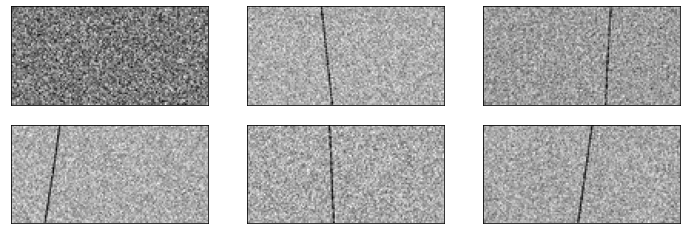

In [23]:
#Visualizing 6 images from the training dataset randomly
plt.figure(0, figsize=(12,4))
for i in range(0,6):
  plt.subplot(2, 3, i+1)
  img = np.squeeze(X_train[np.random.randint(0, X_train.shape[0])])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='gray')

# Create Training and Validation Data Generators

In [26]:
# The ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(X_train)

datagen_val = ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(X_val)

# Building a CNN Model

In [27]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [28]:
model = Sequential()

#1st Convolution Layer
model.add(Conv2D(32,(5,5), padding='same', input_shape=(64, 128, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#2nd Convolution Layer
model.add(Conv2D(64,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#3rd Convolution Layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flattening
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

#Output layer
model.add(Dense(4, activation='softmax'))

Learning Rate Scheduling

In [29]:
initial_lr = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, 
                                                             decay_steps=5, 
                                                             decay_rate=0.96, 
                                                             staircase=True)

optimizer = Adam(learning_rate=lr_schedule)

# Compiling the Model

In [30]:
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 64, 64)        2

# Training the Model

In [32]:
#Will use ModelCheckpoint callback in conjunction with the training using model.fit() to save the model weights at some intervals

checkpoint = ModelCheckpoint('model_weights.h5', monitor='val_loss', 
                             save_weights_only=True, mode='min', verbose=0)

batch_size = 32

history = model.fit(datagen_train.flow(X_train, y_train, batch_size=batch_size, shuffle=True), 
                    steps_per_epoch=len(X_train)//batch_size, 
                    validation_data=datagen_val.flow(X_val, y_val, batch_size=batch_size, shuffle=True), 
                    validation_steps=len(X_val)//batch_size, 
                    epochs=15, callbacks=checkpoint)

Epoch 1/15
100/100 [==============================] - 2s 25ms/step - loss: 0.3681 - accuracy: 0.7462 - val_loss: 0.3680 - val_accuracy: 0.7450
Epoch 2/15
100/100 [==============================] - 2s 23ms/step - loss: 0.3661 - accuracy: 0.7513 - val_loss: 0.3673 - val_accuracy: 0.7462
Epoch 3/15
100/100 [==============================] - 2s 23ms/step - loss: 0.3679 - accuracy: 0.7494 - val_loss: 0.3676 - val_accuracy: 0.7487
Epoch 4/15
100/100 [==============================] - 2s 22ms/step - loss: 0.3839 - accuracy: 0.7334 - val_loss: 0.3654 - val_accuracy: 0.7462
Epoch 5/15
100/100 [==============================] - 2s 23ms/step - loss: 0.3676 - accuracy: 0.7469 - val_loss: 0.3671 - val_accuracy: 0.7475
Epoch 6/15
100/100 [==============================] - 2s 23ms/step - loss: 0.3696 - accuracy: 0.7475 - val_loss: 0.3672 - val_accuracy: 0.7475
Epoch 7/15
100/100 [==============================] - 2s 23ms/step - loss: 0.3646 - accuracy: 0.7666 - val_loss: 0.3664 - val_accuracy: 0.7500

# Evaluating the Model

In [33]:
model.evaluate(X_val, y_val)

25/25 [==============================] - 0s 8ms/step - loss: 0.3682 - accuracy: 0.7500


[0.36816778779029846, 0.75]

In [34]:
import seaborn as sns
from sklearn import metrics

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(X_val), 1)
print(metrics.classification_report(y_true, y_pred))
print('Classification Accuracy: %0.5f' % metrics.accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       200
           1       0.50      0.93      0.65       200
           2       0.53      0.09      0.15       200
           3       1.00      1.00      1.00       200

    accuracy                           0.75       800
   macro avg       0.76      0.75      0.70       800
weighted avg       0.76      0.75      0.70       800

Classification Accuracy: 0.75000


[Text(0, 0.5, 'squiggle'),
 Text(0, 1.5, 'narrowband'),
 Text(0, 2.5, 'narrowbanddrd'),
 Text(0, 3.5, 'noise')]

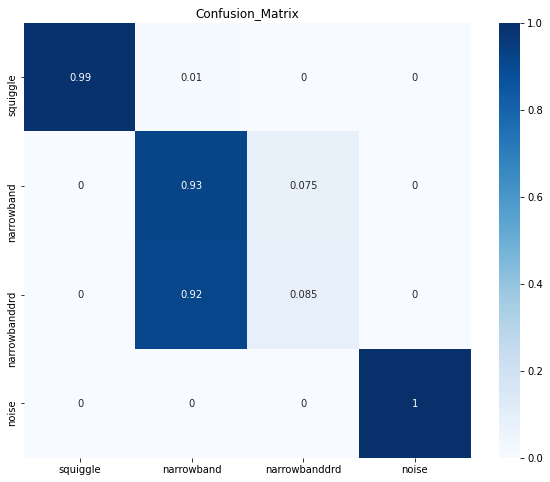

In [39]:
labels = ['squiggle', 'narrowband', 'narrowbanddrd', 'noise']
plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, 
            ax=ax, cmap=plt.cm.Blues)
ax.set_title('Confusion_Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)